In [33]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#1: Exploration du dataset
#Aperçu général
print("\nChargement des données...")
df = pd.read_csv("netflix_titles.csv")
print("\nAperçu des données:")
print(df.head())
print("\nDimension du dataset et types de données")
df.info()
print("\nValeurs manquantes")
print(df.isnull().sum())
print("\nValeurs dupliquées: ", df.duplicated().sum())

#Vérification et nettoyage
print("\nSuppression des lignes vides...")
Avant = len(df)
df.dropna(inplace=True)
print(f"{Avant - len(df)} lignes supprimées (NA). Il reste {len(df)} lignes.")
print("\nSuppression des doublons...")
Avant = len(df)
df.drop_duplicates(inplace=True)
print(f"{Avant - len(df)} doublons supprimés. Il reste {len(df)} lignes.")
print("\nConversion des dates...")
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
print("Conversion terminée. Exemple:")
print(df["date_added"].head())
print("\nTypes de données apres nettoyage:")
print(df.dtypes)

ModuleNotFoundError: No module named 'wordcloud'

In [21]:
#2: Analyse du contenu
#Film vs séries
print("\nProportion en pourcentage: ")
type = df["type"].value_counts(normalize=True) * 100
print(type)
print("\nTendance par année: ")
df["year_added"] = df["date_added"].dt.year
titles = df.groupby(["year_added", "type"]).size().reset_index(name="count")
print(titles.head())
#Genres principaux (listed_in)
print("\nFréquence des genres principaux:")
genres = df["listed_in"].dropna().str.split(", ")
genres_exploded = genres.explode()
genre_counts = genres_exploded.value_counts().head(20)
print(genre_counts)
print("\nRépartition géographique:")
countries = df["country"].dropna().str.split(", ")
countries_exploded = countries.explode()
country_counts = countries_exploded.value_counts().head(20)
print(country_counts)
print("\nTop des acteurs:")
actors = df["cast"].dropna().str.split(", ")
actors_exploded = actors.explode()
top_actors = actors_exploded.value_counts().head(20)
print(top_actors)
print("\nTop des réalisateurs:")
directors = df["director"].dropna().str.split(", ")
directors_exploded = directors.explode()
top_directors = directors_exploded.value_counts().head(10)
print(top_directors)


Proportion en pourcentage: 
type
Movie      97.243061
TV Show     2.756939
Name: proportion, dtype: float64

Tendance par année: 
   year_added   type  count
0      2008.0  Movie      1
1      2009.0  Movie      2
2      2010.0  Movie      1
3      2011.0  Movie     13
4      2012.0  Movie      3

Fréquence des genres principaux:
listed_in
International Movies        2369
Dramas                      2293
Comedies                    1553
Action & Adventure           806
Independent Movies           740
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Horror Movies                336
Stand-Up Comedy              294
Music & Musicals             292
Sci-Fi & Fantasy             236
Sports Movies                156
Classic Movies               108
International TV Shows        87
LGBTQ Movies                  80
Cult Movies                   69
Anime Features                61
Faith & Spirituality          

In [27]:
#Analyse temporelle
print("\nStatistique par rapport aux années")
print(df["release_year"].describe())
print("\nNombre de titres sorties par année")
titles_added_per_year = df["release_year"].value_counts().sort_index()
titles_added_per_year.head(100)



Statistique par rapport aux années
count    5332.000000
mean     2012.742123
std         9.625831
min      1942.000000
25%      2011.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Nombre de titres sorties par année


release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    657
2018    648
2019    519
2020    442
2021    161
Name: count, Length: 72, dtype: int64

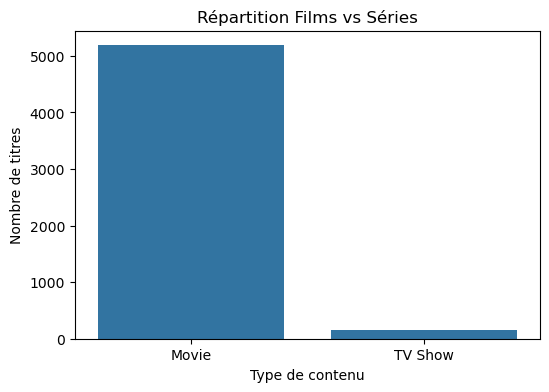

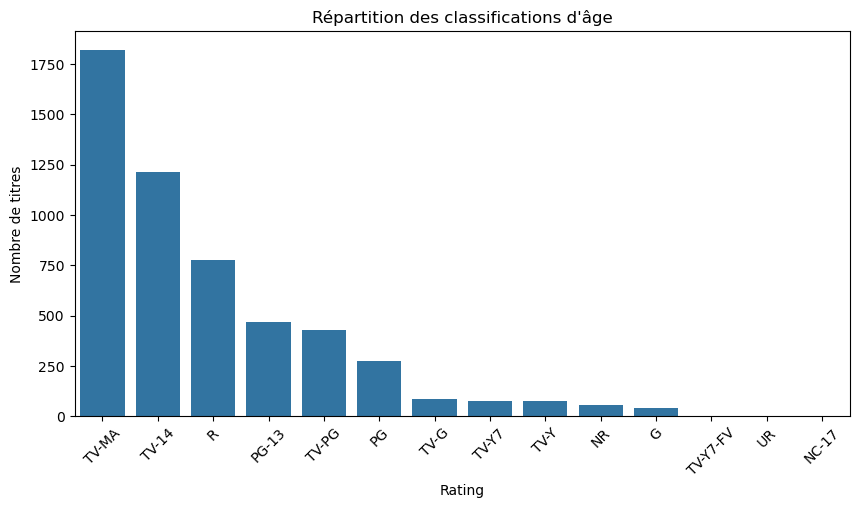

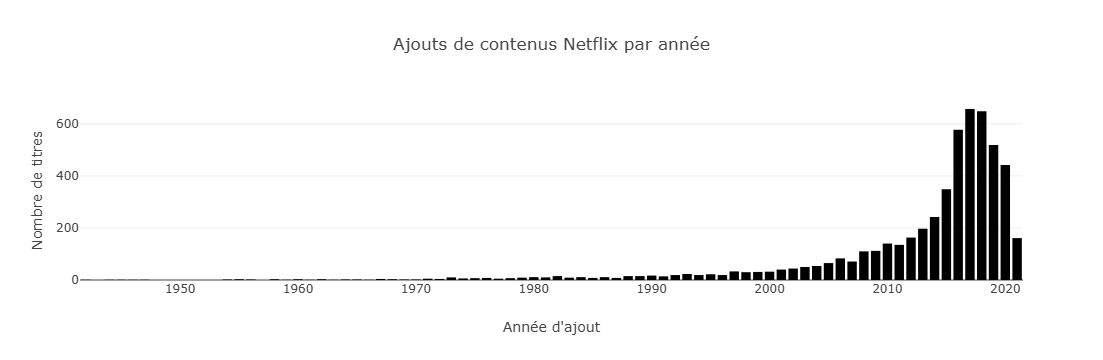

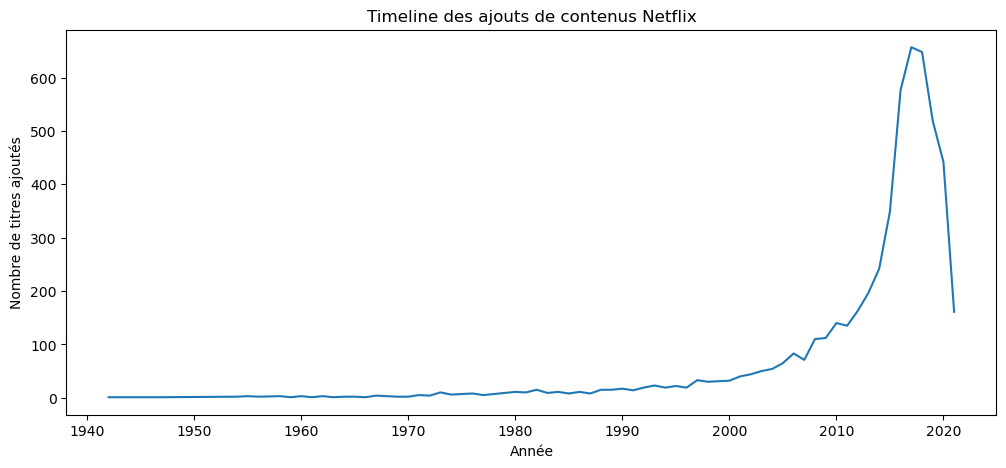

In [35]:
#Visualisation
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Répartition Films vs Séries")
plt.xlabel("Type de contenu")
plt.ylabel("Nombre de titres")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df,
              x="rating",
              order=df["rating"].value_counts().index)
plt.title("Répartition des classifications d'âge")
plt.xlabel("Rating")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.show()

fig = px.bar(
    x=titles_added_per_year.index,
    y=titles_added_per_year.values,
    labels={"x": "Année d'ajout", "y": "Nombre de titres"},
    title="Ajouts de contenus Netflix par année"
)
fig.show()

plt.figure(figsize=(12,5))
sns.lineplot(x=titles_added_per_year.index,
             y=titles_added_per_year.values)
plt.title("Timeline des ajouts de contenus Netflix")
plt.xlabel("Année")
plt.ylabel("Nombre de titres ajoutés")
plt.show()


2025-12-09 20:01:35.998 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 20:01:36.041 
  command:

    streamlit run C:\Users\caron\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-09 20:01:36.042 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 20:01:36.042 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-09 20:01:36.042 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()